Download this notebook
<a href='https://cnn.com'><img src = './images/GitHub_logo.png' height=25 width=25></a>
<a href='https://cnn.com'><img src = './images/UH_logo.jpg' height=25 width=25></a>


We are now ready to work with some data, and our example will be tide gauge data from the UH Sea Level Center (http://uhslc.soest.hawaii.edu).

As with most applications, we start with actually getting the data.  There are many different ways to do this, but in a broad sense we can either get data and store it on a local machine/directory or try access the data directly from a "data server", _e.g._ , a remote web site.  This latter option is not always available, so it's good to learn both methods.  Also, it is sometimes useful to have the data on your local machine, for example, you can still work with it while not on the Internet.

## 1. Getting data onto local machine

The basic process is to visit some web site and download a data set. If you click on something in a browser, the browser will try open it with some known program.  It should also allow you to "save as."

In this example, go to http://uhslc.soest.hawaii.edu --> data --> legacy data. You should see a page like this:

<img src='./images/tide1.png' height=75% width=75%>

<br>

There are four columns to get the data: "Data," "CSV," "NetCDF," and "old NetCDF."  You should get one from eother the CSV or NetCDF columns.  If you "left-click" on the data of interest, _e.g._, Honolulu hourly under CSV, you should get a popup that asks to "save the data":

<img src='./images/tide2.png' height=25% width=25%>
     
<br> 

You now have a local copy of the data.

Recall that you can check if the file is there by opening a terminal session on the jupyterhub, then using the linux ls command: 

    ls -l h003.csv
    
and you can view the file with

    more h003.csv

Now let's look at some examples reading the data.

In [1]:
# First we import needed packages.  Note these three will pretty much be the
# defaults for this class (we'll always use them), and let's stick to the 
# convention of using numpy as np, pandas as pd, and matplotlib.pyplot as plt.
# I will also import xarray for reading NetCDF files and the cartopy package 
# for making maps

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf

## 2. Accessing the data with python
There are many different ways to access data within python, and here we'll go through just a few examples.  In a broad sense we will always follow the same process: read the data in, have a look at it to see if it makes sense, and print out the type and shape to see if they make sense.  It's the details that will vary from case to case.  

Note it is always useful to look at the data when downloaded to make sure it makes sense.  For example, if you read in a dataset and expect hundreds of rows, and instead see only one, something went wrong.

We will use a few different methods, including:
  1. read from local disk using numpy loadtxt
  2. read from remote server using pandas read_csv
  3. read from remote server using xarray
  
Note that you could also read pandas and netCDF files from local disk, use the pandas read_table method, _etc._  There is also the netCDF4 package that could be used (any maybe many others as well).

### 2.1 Read from local disk using numpy loadtxt
The syntax is filename, delimiter, comments in this case we have comma-separated, with no comment/header lines, but it doesn't hurt to keep this.

In [3]:
data = np.loadtxt('./data/h001.csv', delimiter=',', comments='#')

In [4]:
#     We now have a variable called "data" that should
#     have all the sea level data in it.  Let's print
#     the type, shape and look at the data just to make
#     sure.  NOTE: type is an internal function, so the
#     syntax is type(data), while shape is a method of
#     the object data, so it's syntax is data.shape()

print( 'Data are ', type(data), ' shape is ', data.shape )
print(data)

Data are  <class 'numpy.ndarray'>  shape is  (200537, 5)
[[2001.   12.   16.    6. 1333.]
 [2001.   12.   16.    7. 1130.]
 [2001.   12.   16.    8.  867.]
 ...
 [2024.   10.   31.   20.  523.]
 [2024.   10.   31.   21.  409.]
 [2024.   10.   31.   22.  403.]]


The data are now loaded into a variable called "data"; note the object is a numpy array, and there are 200,537 rows and five columns.  Here we either check the web site or just assume by inspection that the columns are: year, month, day, hour, and sea level (in mm). 

Next, we assign the columns to individual variables.  NOTE: since our object "data" is a numpy array, we use the synax of [row,column], with ":" meaning all so "year = data[:,0]" means the variable "year" will be set to "all rows", "first column" of "data":


In [5]:
year = data[:,0]
month = data[:,1]
day = data[:,2]
hour = data[:,3]
sea_level = data[:,4]

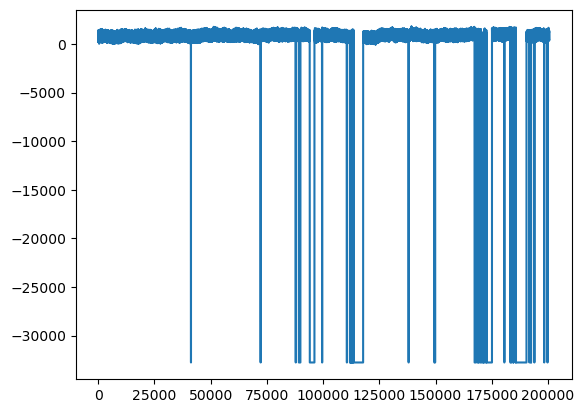

In [6]:
#     Finally, to check what we have, let's make a quick
#     plot of sea_level
plt.plot(sea_level);

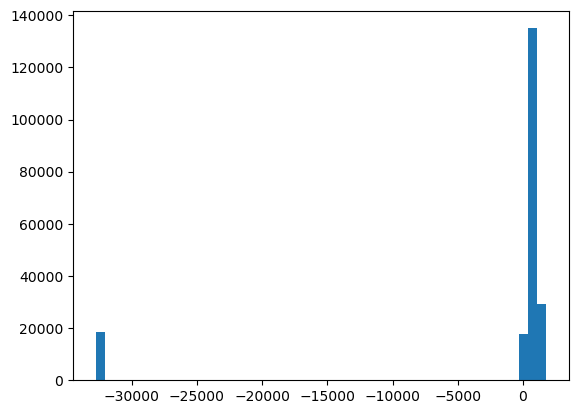

In [7]:
plt.hist(sea_level,bins=50);

### 2.2 Read from remote server using pandas read_csv
Here we just need the URL to the data set.  To get this, just right-click on the desired file on the web page and select "copy link." In this example, I went to the top line (data set 001 for Pohnpei and right-clicked on the hourly link in the CSV column.  This gives https://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h001.csv

Note here that read_csv uses "sep" instead of "delimiter" and "comment" instead of "comments".  We also need to add "header = None" so that the first line of data is not used as the column headings.

In [8]:
url = 'https://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h001.csv'
data = pd.read_csv(url, sep=',', header = None, comment='#')

In [9]:
#     Again, let's check what we have:

print( 'Data are ', type(data), ' shape is ', data.shape )
data.head()

Data are  <class 'pandas.core.frame.DataFrame'>  shape is  (204162, 5)


,0,1,2,3,4
0,2001,12,16,6,1333
1,2001,12,16,7,1130
2,2001,12,16,8,867
3,2001,12,16,9,553
4,2001,12,16,10,308


Notice we have a nicely formatted table, with a row index (starting at zero) and column headings.  However, since this data set had no headings, we had to inform pandas to not use the first row of data as the headings.  So we want to put our own headings.  We can either do that when reading the data or after the fact:

      column_headings = ['column 1', 'column 2', 'column 3']
      df = pd.read_csv(data,names=column_headings)

or

      df = pd.read_csv(data)
      df.rename(columns={'0': 'column 1', '1': 'column 2', '2': 'column 3'}, inplace=True)
      

In [10]:
# define a list that contains our desired headings
column_headings = ['year', 'month', 'day', 'hour', 'sea level']

# now add that to the read_csv
data = pd.read_csv(url, sep=',', header = None, comment='#', names = column_headings)
data.head()

,year,month,day,hour,sea level
0,2001,12,16,6,1333
1,2001,12,16,7,1130
2,2001,12,16,8,867
3,2001,12,16,9,553
4,2001,12,16,10,308


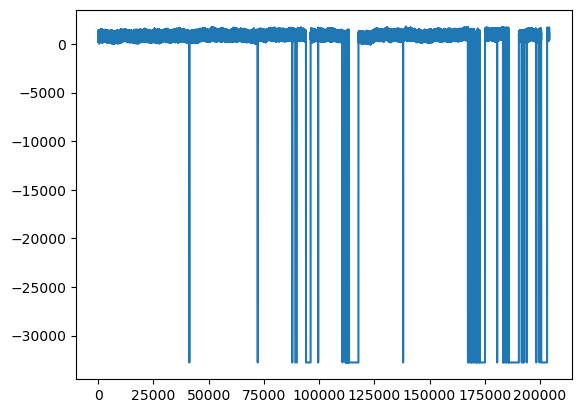

In [11]:
#     So now we have a nice looking table.  NOTE: since
#     this is a DataFrame, we access the rows/columns
#     differently than with the arrays (e.g., remember
#     before we had data[:,0]).  Now we simply address
#     the column by its heading.  So, to make a plot:

plt.plot(data['sea level']);

#### Dealing with time
The data file provides time as four different numbers in four different columns: year, month, day, hour.  We would like to convert this to a proper "datetime" value.  There are two ways we can do this: converting these four columns or using the index/row number.  Note the latter options assumes the data are monotomic in time (_i.e._, no missing times).

For the first option we convert the four columns to a date string, _e.g._, 2021-01-05 06:00, then pass that to datetime.

For the second option, we have an index in the DataFrame that indicates each row (reminder this starts at zero).  Since we have one hour per row, the index amounts to "hours since", and the first time value is December 16, 2001 at 06:00.  Thus, row one is "zero hours since 12/16/2021 06:00", second row "1 hour since 12/16/2021 06:00" and so on.

In [12]:
# Option 1
# 1. make new variable
measurement_date = data['year'].astype(str) + '-' + data['month'].astype(str) + '-' \
                 + data['day'].astype(str) + '-' + data['hour'].astype(str)

# 2. add to dataframe
data['date'] = measurement_date

# 3. convert to datetime
#   note we specify our format: %Y=4 character year; %m=2 character month
#             %d=2 character day %H one character hour
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d-%H')
data.head()

,year,month,day,hour,sea level,date
0,2001,12,16,6,1333,2001-12-16 06:00:00
1,2001,12,16,7,1130,2001-12-16 07:00:00
2,2001,12,16,8,867,2001-12-16 08:00:00
3,2001,12,16,9,553,2001-12-16 09:00:00
4,2001,12,16,10,308,2001-12-16 10:00:00


In [13]:
# Option 2
# pd.to_datetime() can also take a "date", an "origin", and a format 
# so if we specify the index and "hours since may-14-1993", each row 
# will have the proper time (note this is just one way to do it).

date = pd.to_datetime(data.index*3600.0 + 6.0*3600.0, origin = '12-16-2001', unit='s')

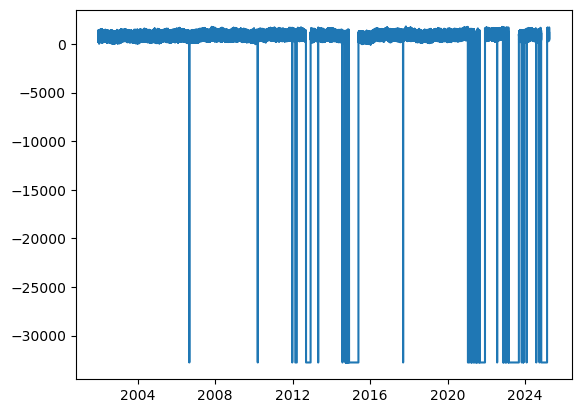

In [14]:
# Now we can plot with a more "sensible" time
plt.plot(date,data['sea level']);

#### Replace missing values

In [15]:
# We notice that missing values are set to some extreme
# negative number (turns out to be -32768).  We want to
# remove these to make our plot look better.  Note there
# are several ways to do this, but here we just replace
# all negative values with "nan" or "not a number"
data[data['sea level'] < 0 ] = np.nan

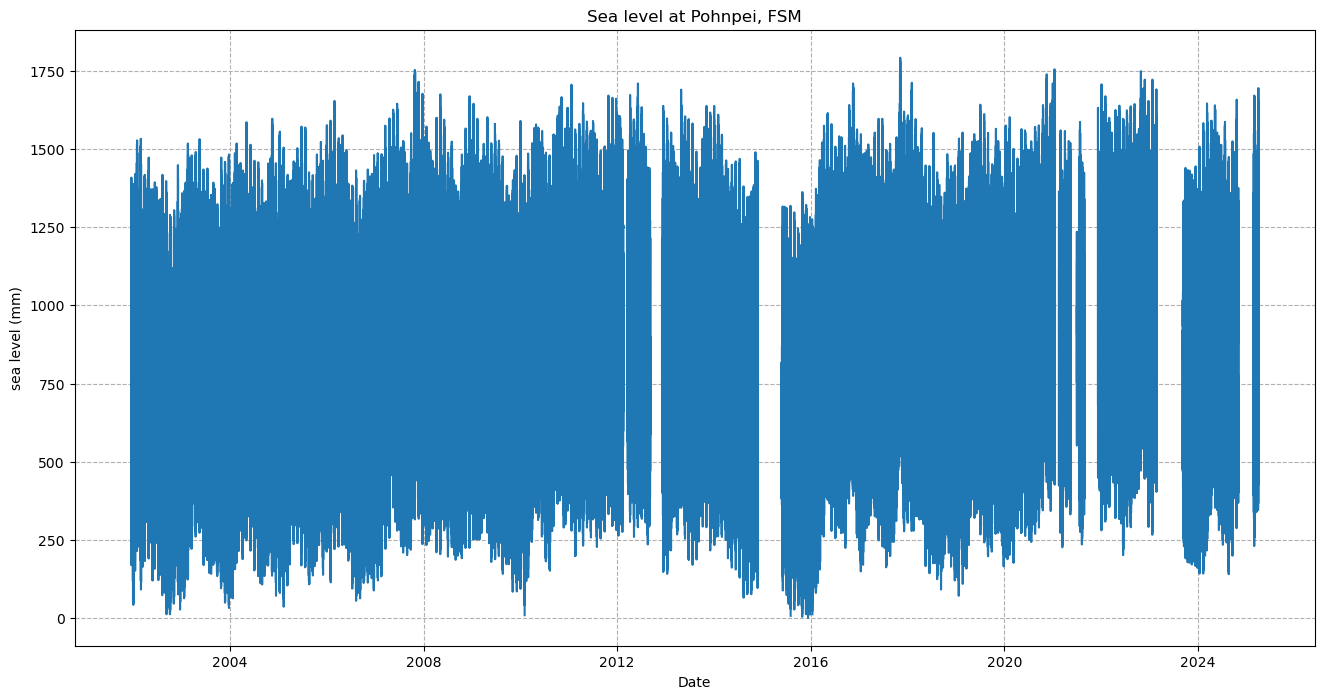

In [16]:
plt.figure(figsize=(16,8))
plt.plot(data['date'],data['sea level'])
plt.grid(linestyle='dashed')
plt.title('Sea level at Pohnpei, FSM')
plt.xlabel('Date')
plt.ylabel('sea level (mm)');

### 2.3 Read from remote server using xarray
Recall that reading data from OPeNDAP servers gives a netcdf data model as a reply.  So, here we'll access data from the UHSLC  OPeNDAP server.  On their web site, under the data page, there is a link to their server (https://uhslc.soest.hawaii.edu/opendap/).  On that page is a link to "fast" and then "hourly."  Once there, the top data set is h001.  When selecting this, we get the data URL at the top, _i.e._, http://uhslc.soest.hawaii.edu/opendap/fast/hourly/h001.nc


In [17]:
url = 'http://uhslc.soest.hawaii.edu/opendap/fast/hourly/h001.nc'
data = xr.open_dataset(url)

There are many ways to explore the dataset, including,
  1. simply enter the dataset to get all the information
  2. __data.dims__ will list the dimensions and their size
  3. __data.variables__ gives all the variable information
  3. __data.data_vars__ gives variable names
  4. __data.attrs__ gives the variable attributes

In [18]:
#data
#data.dims
#data.variables
#data.data_vars
#data.attrs

In [19]:
#     The data can be extracted in a similar way
#     where we specify the input variable name.
#     For example, we can set the dataset variable
#     "lon" to a variable longitude:
time = data['time'][:]
latitude = data['lat'][:]
longitude = data['lon'][:]
sea_level = data['sea_level'][0,:]

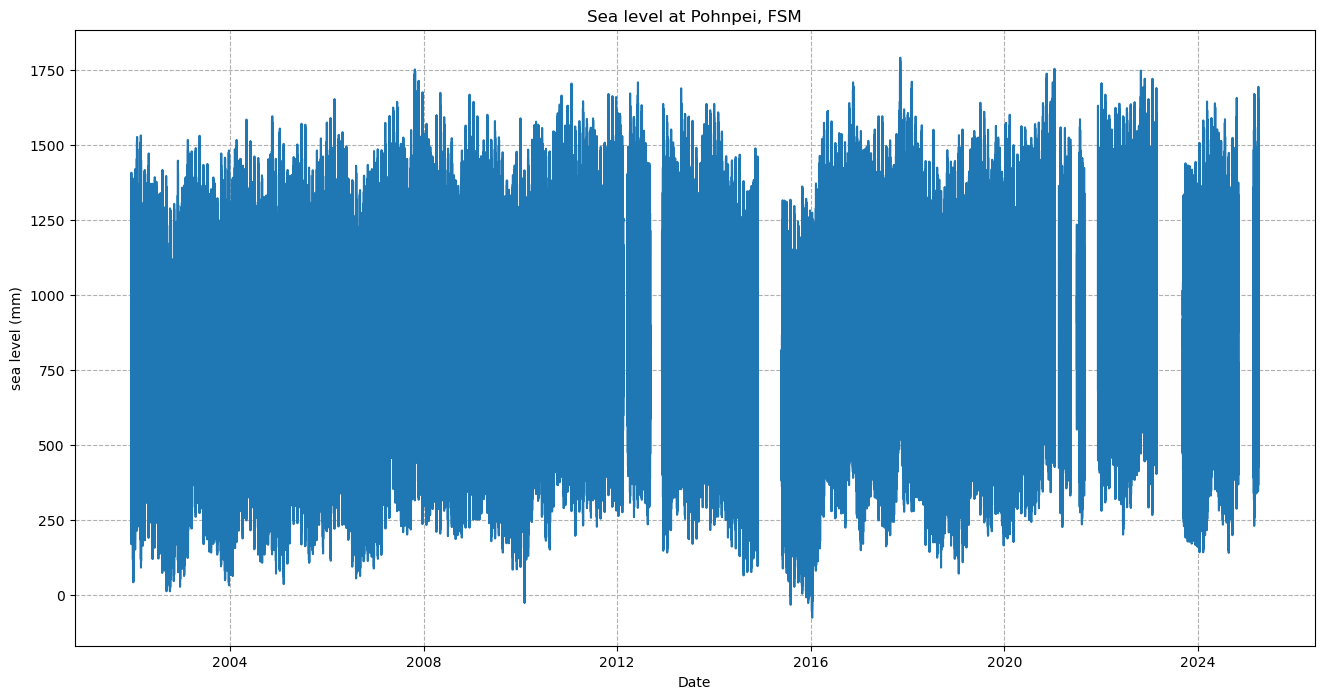

In [20]:
plt.figure(figsize=(16,8))
plt.plot(time,sea_level)
plt.grid(linestyle='dashed')
plt.title('Sea level at Pohnpei, FSM')
plt.xlabel('Date')
plt.ylabel('sea level (mm)');

Note here that we didn't have to worry about time _or_ missing values; the netCDF data model takes care of all that for us.

## 3. Working with the data
### 3.1 Subset
A quick thing we can do is try plot the data between a certain range.  Let's pull data for Honolulu and Midway, then make a plot over mid May 1960 to see if we can observe the tsunami generated by the Chile earthquake.


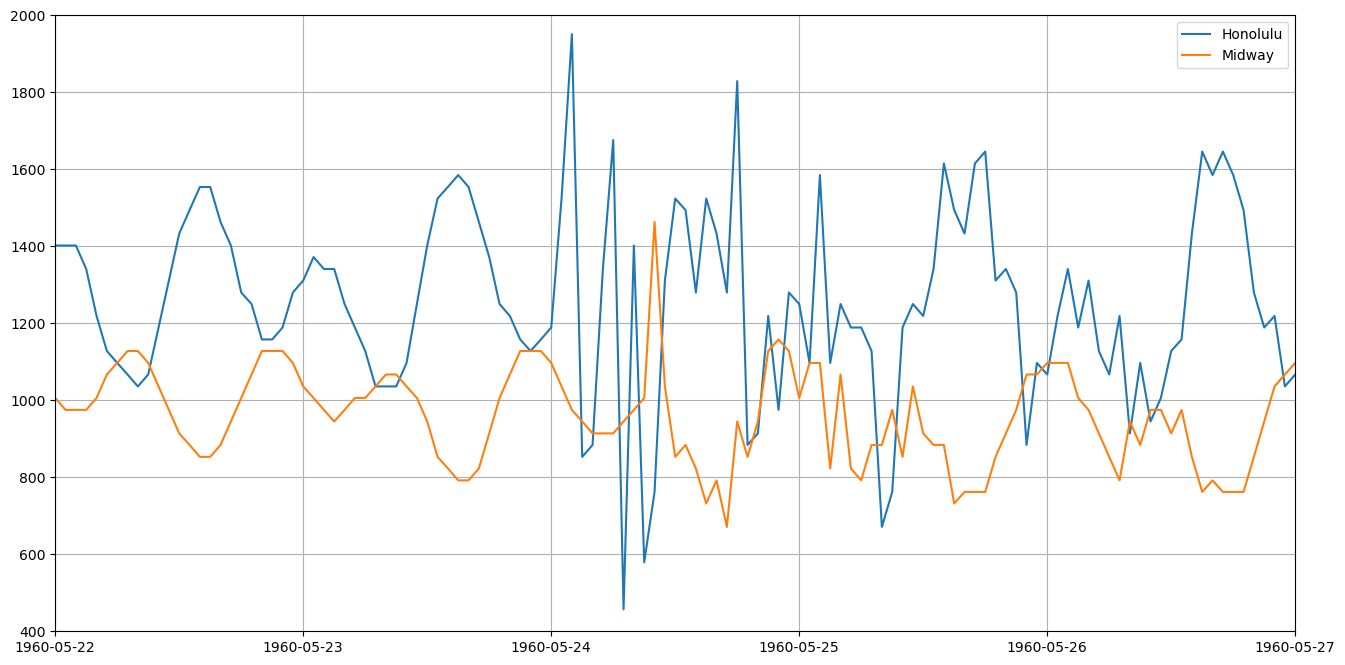

In [21]:
import datetime as dt
# read data from URL; specify URL here
HI_URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv'
MW_URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h050.csv'

# define column headings
column_headings = ['year', 'month', 'day', 'hour', 'sea level']

# read data into DataFrame called "data"
HI_data = pd.read_csv(HI_URL,names=column_headings)
MW_data = pd.read_csv(MW_URL,names=column_headings)

# convert time into a reasonal date format
HI_date = pd.to_datetime(HI_data.index*3600.0, origin = '01-02-1905', unit='s')
MW_date = pd.to_datetime(MW_data.index*3600.0, origin = '02-09-1947', unit='s')

# plot
plt.figure(figsize=(16,8))
plt.plot(HI_date,HI_data['sea level'],label='Honolulu')
plt.plot(MW_date,MW_data['sea level'],label='Midway')
plt.xlim([dt.datetime(1960,5,22),dt.datetime(1960,5,27)])
plt.ylim(400,2000)
plt.grid()
plt.legend();

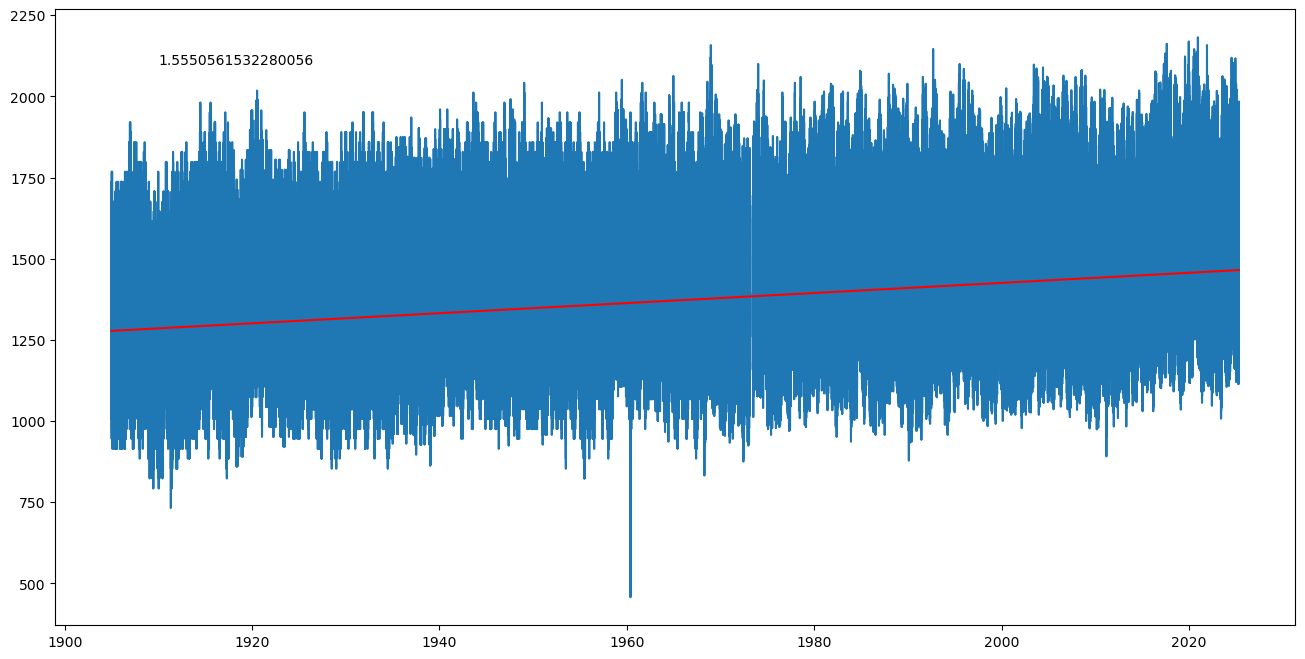

In [22]:
# read data from URL; specify URL here
HI_URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv'

# define column headings
column_headings = ['year', 'month', 'day', 'hour', 'sea level']

# read data into DataFrame called "data"
HI_data = pd.read_csv(HI_URL,names=column_headings)

# convert time into a reasonal date format
HI_date = pd.to_datetime(HI_data.index*3600.0, origin = '01-02-1905', unit='s')

# replace missing values with mean
# find values equal to -32767 and replace with nan
HI_data2 = HI_data.replace(-32767,np.nan)

# replace these nan values with the mean
HI_data3 = HI_data2.fillna(np.nanmean(HI_data2))

# compute the linear trend
B = np.polyfit(HI_data3.index.values,HI_data3['sea level'],1)
ssh_trend = np.polyval(B,HI_data.index.values)

plt.figure(figsize=(16,8))
trend = str(B[0] * 24.0 * 365.0 * 10.0 / 10.0)
plt.plot(HI_date,HI_data2['sea level'])
plt.plot(HI_date,ssh_trend,'r-')
plt.text(dt.date(1910,1,1,),2100,trend);

Now repeat the same thing, but use netCDF data

In [23]:
url = 'http://uhslc.soest.hawaii.edu/opendap/fast/hourly/h057.nc'
HI_data = xr.open_dataset(url)
url = 'http://uhslc.soest.hawaii.edu/opendap/fast/hourly/h050.nc'
MW_data = xr.open_dataset(url)

In [24]:
HI_slsub = HI_data.sel(time=slice('1960-05-22', '1960-05-27'))
HI_date = HI_slsub['time'][:]
HI_data = HI_slsub['sea_level'][0,:]

MW_slsub = MW_data.sel(time=slice('1960-05-22', '1960-05-27'))
MW_date = MW_slsub['time'][:]
MW_data = MW_slsub['sea_level'][0,:]

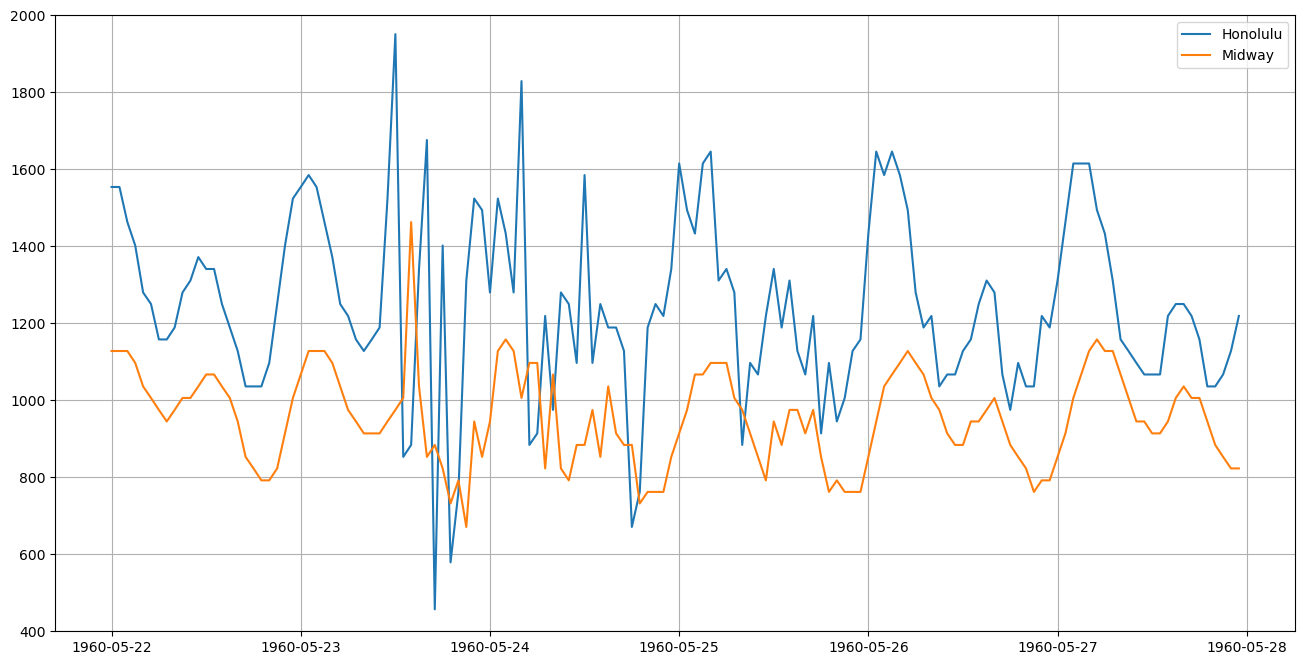

In [25]:
# plot
plt.figure(figsize=(16,8))
plt.plot(HI_date,HI_data,label='Honolulu')
plt.plot(MW_date,MW_data,label='Midway')
plt.ylim(400,2000)
plt.grid()
plt.legend();

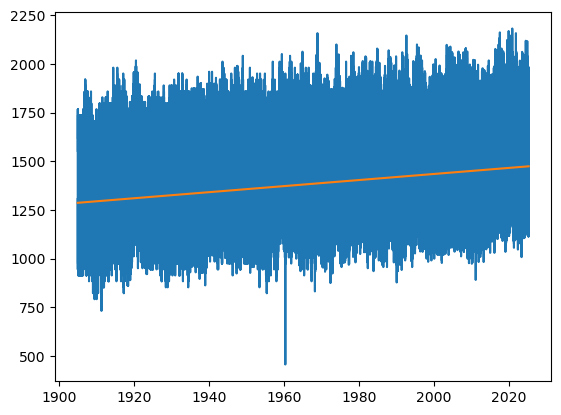

In [26]:
url = 'http://uhslc.soest.hawaii.edu/opendap/fast/hourly/h057.nc'
data = xr.open_dataset(url)
time = data['time'][:]
latitude = data['lat'][:]
longitude = data['lon'][:]
sea_level = data['sea_level'][0,:]
sea_level2 = sea_level.fillna(sea_level.mean())
t = np.linspace(0,len(sea_level2),len(sea_level2))
m, b = np.polyfit(t,sea_level2,deg=1)
trend = m * t + b
plt.plot(time,sea_level2)
plt.plot(time,trend);

## 4. Automation

In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cf

In [28]:
# supply a station id (e.g., 'h001') and get back
# lon, lat, time and sea level
def get_sl(station_id):
    # get data
    url = 'http://uhslc.soest.hawaii.edu/opendap/fast/hourly/' + station_id + '.nc'
    data = xr.open_dataset(url)
    # find spec's
    lat = data['lat'].values[0]
    lon = data['lon'].values[0]
    time = data['time'][:]
    loc = str(data['station_name'].values[0])
    return lon, lat, loc[2:-1], time, data['sea_level'][0,:]

In [29]:
# supply raw data
# get back the linear trend
def get_trend(sea_level):
    sea_level2 = sea_level.fillna(sea_level.mean())
    sea_level2 = sea_level2 - sea_level2.mean()
    t = np.linspace(0,len(sea_level2),len(sea_level2))
    m, b = np.polyfit(t,sea_level2,deg=1)
    trend = m * t + b
    return sea_level2, trend, m

In [30]:
# supply lon, lat and tide gauge location and get back a map
def plot_map1(lon,lat,location):
    # define ranges
    lat1 = lat - 20.0
    lat2 = lat + 20.0
    lon1 = lon - 20.0
    lon2 = lon + 20.0
    
    # make plot
    plt.figure(figsize=(12,12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE)
    ax.set_extent([lon1,lon2,lat1,lat2],crs=ccrs.PlateCarree())
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,
                     linewidth=2, color='grey',alpha=.05,linestyle='dashed')
    ax.annotate('*',xy=[lon,lat],xycoords=ccrs.PlateCarree(),color='red',ha='center',
                va='center',size=20.0)
    ax.set_title('Tide Gauge Station ' + location)

In [31]:
# supply the time, sea level and trend
# get back plot of the raw data with trend line
def plot_data1(time,sea_level2,trend,m,location):
    fig, ax = plt.subplots()
    plt.plot(time,sea_level2)
    plt.plot(time,trend,color='red')
    
    B = m * 24.0 * 365.0 * 10.0 / 10.0
    slope = 'Trend = ' + str(int(B*100)/100.0) + ' cm/decade'
    plt.text(0.025,0.025,slope,ha='left',va='center',transform=ax.transAxes)
    plt.grid(color='grey')
    plt.xlabel('Date')
    plt.ylabel('Sea level (mm)')
    plt.title('Tide Gauge Station ' + location)

In [32]:
# supply the time, interval and raw data
# get back plot of spectrum
def plot_spectra1(time,rate,data,location):
    spec = np.abs(np.fft.rfft(data))
    f = np.linspace(0, rate/2, len(spec))
    plt.xlim(0.1,100)
    plt.loglog(1/f/24,spec)
    plt.xlabel('Period (days)')
    plt.ylabel('Power')
    plt.grid(color='grey')
    plt.title('Tide Gauge Station ' + location)

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_60624/3969099160.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(1/f/24,spec)


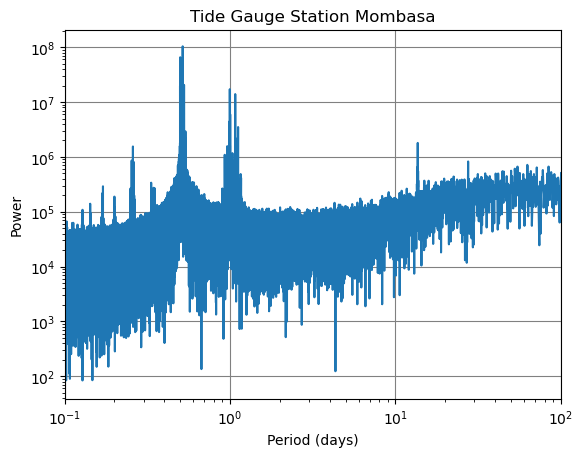

In [33]:
station_id = 'h101'
lon, lat, location, time, data = get_sl(station_id)
sl2, trend, m = get_trend(data)

#plot_map1(lon,lat,location)
#plot_data1(time,sl2,trend,m,location)
plot_spectra1(time,1.0,sl2,location);

In [34]:
# supply lon, lat and tide gauge location and get back a map
def plot_map2(ax,lon,lat,location):
    # define ranges
    lat1 = lat - 20.0
    lat2 = lat + 20.0
    lon1 = lon - 20.0
    lon2 = lon + 20.0
    
    # make plot
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE)
    ax.set_extent([lon1,lon2,lat1,lat2],crs=ccrs.PlateCarree())
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,
                     linewidth=2, color='grey',alpha=.05,linestyle='dashed')
    ax.annotate('*',xy=[lon,lat],xycoords=ccrs.PlateCarree(),color='red',ha='center',va='center',size=20.0)
    out = ax.set_title('Tide Gauge Station ' + location)
    return out

In [35]:
# supply the time, sea level and trend
# get back plot of the raw data with trend line
def plot_data2(ax,time,sea_level2,trend,m,location):
    #fig, ax = plt.subplots()
    ax.plot(time,sea_level2)
    ax.plot(time,trend,color='red')
    
    B = m * 24.0 * 365.0 * 10.0 / 10.0
    slope = 'Trend = ' + str(int(B*100)/100.0) + ' cm/decade'
    ax.text(0.025,0.025,slope,ha='left',va='center',transform=ax.transAxes)
    ax.grid(color='grey')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sea level (mm)')
    out = ax.set_title('Tide Gauge Station ' + location)
    return out

In [36]:
# supply the time, interval and raw data
# get back plot of spectrum
def plot_spectra2(ax,time,rate,data,location):
    spec = np.abs(np.fft.rfft(data))
    f = np.linspace(0, rate/2, len(spec))
    ax.set_xlim(0.1,100)
    ax.loglog(1/f/24,spec)
    ax.set_xlabel('Period (days)')
    ax.set_ylabel('Power')
    ax.grid(color='grey')
    out = ax.set_title('Tide Gauge Station ' + location)
    return out

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_60624/123722559.py:7: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(1/f/24,spec)


Text(0.5, 1.0, 'Tide Gauge Station Mombasa')

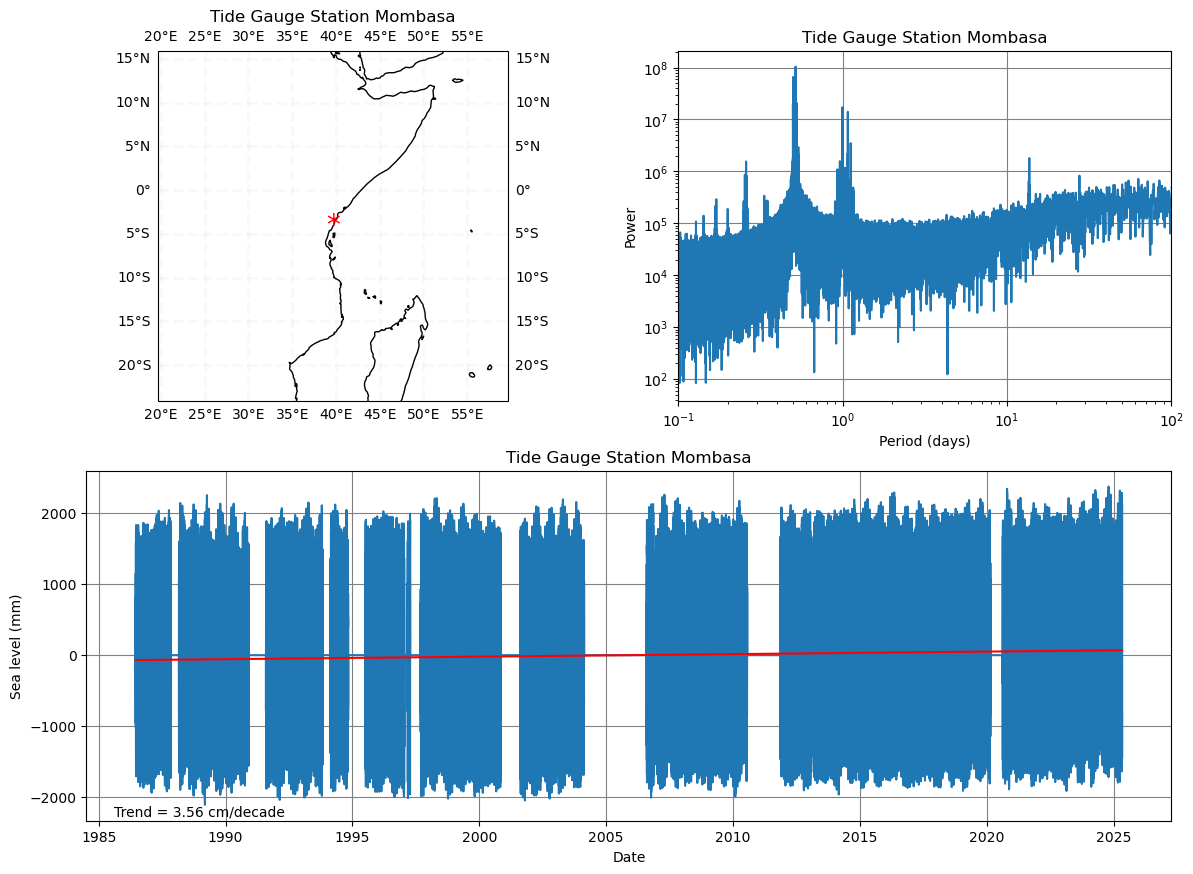

In [37]:
#fig, ax = plt.subplots(nrows=2,ncols=1)
plt.figure(figsize=(14,10))
ax1 = plt.subplot(2,2,1, projection=ccrs.PlateCarree())
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
plot_map2(ax1,lon,lat,location)
plot_spectra2(ax2,time,1.0,sl2,location)
plot_data2(ax3,time,sl2,trend,m,location)

In [38]:
def spectrum1(h, dt=1):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice] 
    ft = np.fft.fft(h)[pslice]
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    # Normalization for Power Spectrum
    psraw /= nt**2
    # Convert PS to Power Spectral Density
    psdraw = psraw * dt * nt  # nt * dt is record length
    return freqs, psraw, psdraw


In [39]:
def spectrum2(h, dt=1, nsmooth=5):
    """
    Add simple boxcar smoothing to the raw periodogram.
    
    Chop off the ends to avoid end effects.
    """
    freqs, ps, psd = spectrum1(h, dt=dt)
    weights = np.ones(nsmooth, dtype=float) / nsmooth
    ps_s = np.convolve(ps, weights, mode='valid')
    psd_s = np.convolve(psd, weights, mode='valid')
    freqs_s = np.convolve(freqs, weights, mode='valid')
    return freqs_s, ps_s, psd_s

In [40]:
def spectrum3(h, dt=1, nsmooth=5):
    """
    Detrend first.
    """
    t = np.arange(len(h))
    p = np.polyfit(t, h, 1)
    h_detrended = h - np.polyval(p, t)
    return spectrum2(h_detrended, dt=dt, nsmooth=nsmooth)
    
